In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

datafile = '../data/country_gdp_growth.csv'
shapefile = '../data/world_shape/ne_10m_admin_0_countries_lakes.shp'

colors = 9
cmap = 'RdYlGn'
figsize = (16, 10)
year = '2017'
cols = ['Country Name', 'Country Code', year]
title = 'Rast BDP držav v letu {}'.format(year)

In [2]:
world = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']]
world.head()

,ADM0_A3,geometry
0,IDN,(POLYGON ((117.7036079039552 4.163414542001791...
1,MYS,(POLYGON ((117.7036079039552 4.163414542001791...
2,CHL,(POLYGON ((-69.51008875199994 -17.506588197999...
3,BOL,POLYGON ((-69.51008875199994 -17.5065881979999...
4,PER,(POLYGON ((-69.51008875199994 -17.506588197999...


In [3]:
df = pd.read_csv(datafile, skiprows=4, usecols=cols)
df.sample(5)

,Country Name,Country Code,2017
249,United States,USA,2.273339
58,Algeria,DZA,1.600000
91,Guam,GUM,0.192049
3,Albania,ALB,3.835544
258,Samoa,WSM,2.704799


In [4]:
merged = world.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.describe()

,2017
count,193.000000
mean,3.331904
std,3.725614
min,-9.530269
25%,1.783498
50%,3.280465
75%,4.704035
max,26.675870


<Figure size 432x288 with 0 Axes>

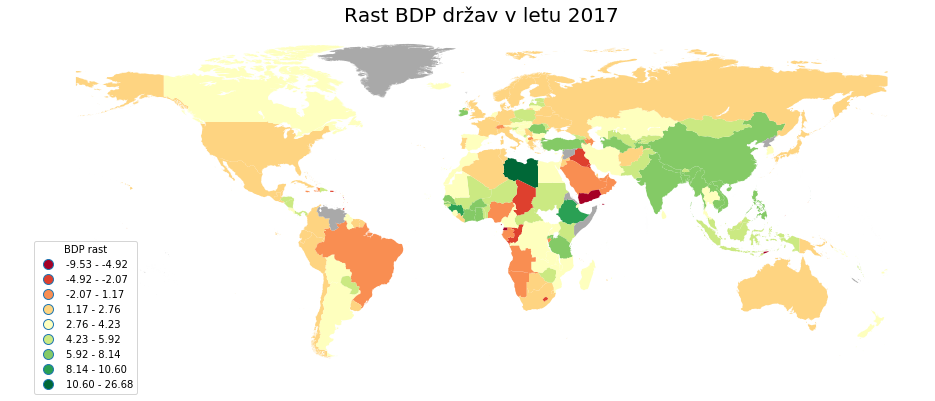

In [5]:
fig = plt.figure()
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='fisher_jenks', k=colors, legend=True)

merged[merged.isna().any(axis=1)].plot(ax=ax, facecolor='#A9A9A9')

ax.set_axis_off()
ax.set_title(title, fontdict={'fontsize': 20})
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.get_legend().set_title('BDP rast')

In [7]:
ax.get_figure().savefig('../img/country_growth_gdp_{}.png'.format(year))